<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Audio-ML/blob/main/Notebooks/Audio_ML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music genre classification : implement a `RNN-LSTM` network  

Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step.

📚 **Extra-curriculam**


[RNNs](https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/)

## 0 . Prerequirities

In [ ]:
# Imports
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# Downloading json file to our local colab notebook
from google.colab import drive
drive.mount('/content/drive')
%cp '/content/drive/My Drive/data_10.json' '/content/'

Mounted at /content/drive


In [ ]:
# path to json file that stores MFCCs and genre labels for each processed segment
DATASET_PATH = "/content/dataset/Data"
JSON_PATH = "/content/data_10.json"

🔑 **Required functions for following purposes**

* Loading data
* Tracking model results
* Preparing dataset

In [ ]:
def load_data(json_path = JSON_PATH) :
  """
  Loading training data from json file

  :param data_path (str) : Path to json file containing data
  :return X (ndarray) : Inputs
  :return y (ndarray) : Targets

  """
  with open(json_path , "r") as fp :
    data = json.load(fp)

  X = np.array(data["mfcc"])
  y = np.array(data["lables"])

  # Data successfully loaded
  return X , y

def plot_history(history) :
  """
  Plots accuracy/loss for training/validation set as a function of the epochs

  :param
  """
  # plotting Accuuracy for train and test
  plt.subplot(2,2,1)
  plt.plot(history.history["Accuracy"] , label = "train_acc")
  plt.plot(history.history["val_Accuracy"] , label = "test_acc")
  plt.legend()
  plt.title("Accuracy")

  # plotting Accuracy for train and  test
  plt.subplot(2,2,2)
  plt.plot(history.history["loss"] , label = "train error")
  plt.plot(history.history["val_loss"] , label = "test error")
  plt.legend()
  plt.title("Error")

def prepare_dataset(test_size , validation_size) :

  """
    Loads data and splits it into train, validation and test sets.

    :param test_size (float) : Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float) : Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray) : Input targeting set
    :return X_validation (ndarray) : Input validation set
    :return X_test (ndarray) : Input test set
    :return y_train (ndarray) : Target training set
    :return y_validation (ndarray) : Target validation set
    :return y_test (ndarray) : Target test set

  """
  # Dividing the data to 3 parts train , validation , test
  X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = test_size)
  X_train , X_validation , y_train , y_validation = train_test_split(X_train , y_train , test_size = validation_size)

  # adding new dimension to input data not targets
  X_train = X_train[... , np.newaxis]
  X_validation = X_validation[... , np.newaxis]
  X_test = X_test[... , np.newaxis]

  # Return
  return X_train , X_validation , X_test , y_train , y_validation , y_test

## 1 . Build RNN-LSTM

In [ ]:
# TODO : 64 LSTM return_sequence = True
# TODO : 64 LSTM
# TODO : 64 Dense + relu
# TODO : 0.3 Dropout
# TODO : 10 Dense + softmax
# TODO :

In [ ]:
def build_model(input_shape) :
  """
  Generates RNN-LSTM model

  :param input_shape (tuple) : input shape of data

  :return model : RNN-LSTM model
  """

  model = tf.keras.Sequential([

      # LSTM layer
      tf.keras.layers.LSTM(64 , input_shape = input_shape , return_sequences = True) ,
      tf.keras.layers.LSTM(64) ,

      # Dense layer
      tf.keras.layers.Dense(64 , activation = "relu") ,
      tf.keras.layers.Dropout(0.3) ,

      # output layer
      tf.keras.layers.Dense(10 , activation = "softmax")

  ])

  return model

📖 **Food for thought**

there are two important parameters that can be seted for `LSTM` layer :

* `return_sequence = True`

the argument return_sequences=True is set to true, to get an output shape of (64, 100, 65). If this argument is set to False, then only the last output would be returned, so for batch of 64, output would be (64, 65) i.e. for every sequence of 100 characters, only the last predicted character would be returned.


* `stateful=True`

From the documentation, "If True, the last state for each sample at index i in a batch will be used as initial state for the sample of index i in the following batch."


![image.png](https://i.sstatic.net/p971i.png)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 177ms/step - Accuracy: 0.2804 - loss: 1.9960 - val_Accuracy: 0.4566 - val_loss: 1.5389
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 150ms/step - Accuracy: 0.4789 - loss: 1.4822 - val_Accuracy: 0.4813 - val_loss: 1.4232
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 157ms/step - Accuracy: 0.5178 - loss: 1.3415 - val_Accuracy: 0.5247 - val_loss: 1.2761
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 44s 171ms/step - Accuracy: 0.5629 - loss: 1.2554 - val_Accuracy: 0.5648 - val_loss: 1.2181
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 178ms/step - Accuracy: 0.5729 - loss: 1.1998 - val_Accuracy: 0.5748 - val_loss: 1.1479
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 169ms/step - Accuracy: 0.6221 - loss: 1.0835 - val_Accuracy: 0.5915 - val_loss: 1.1355
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step - Accuracy: 0.6139 - loss: 1.0698 - val_Accuracy: 0.6255 - val_loss: 1.0422
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 44s 173ms/step - Accuracy: 0.6517 - loss: 1.0144 - val

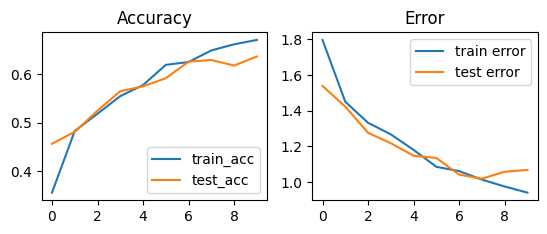

In [ ]:
if __name__ == "__main__" :
    # Loading the whole of data
  X , y = load_data(json_path = JSON_PATH)

  # Extracting Xsssss
  X_train , X_validation , X_test , y_train , y_validation , y_test = prepare_dataset(test_size = 0.25 , validation_size = 0.2)

  # finding input shape
  # input_shape = np.asarray([1] + list(X_train.shape[1:]))
  input_shape = (X_train.shape[1], X_train.shape[2])
  # build model
  model = build_model(input_shape = input_shape)

  # compie model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
                loss = 'sparse_categorical_crossentropy' ,
                metrics = ["Accuracy"])

  # train model
  history = model.fit(x = X_train ,
                      y = y_train ,
                      epochs = 10 ,
                      validation_data = (X_validation , y_validation) ,
                      batch_size = 32)

  # plotting model history : model accuracy and loss
  plot_history(history)

  # evaluating model
  test_loss , test_acc = model.evaluate(X_test , y_test)
  print(f"evaluated  Results : \n test_loss : {test_loss} | test_acc : {test_acc}")

## 2 . Appendix

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step


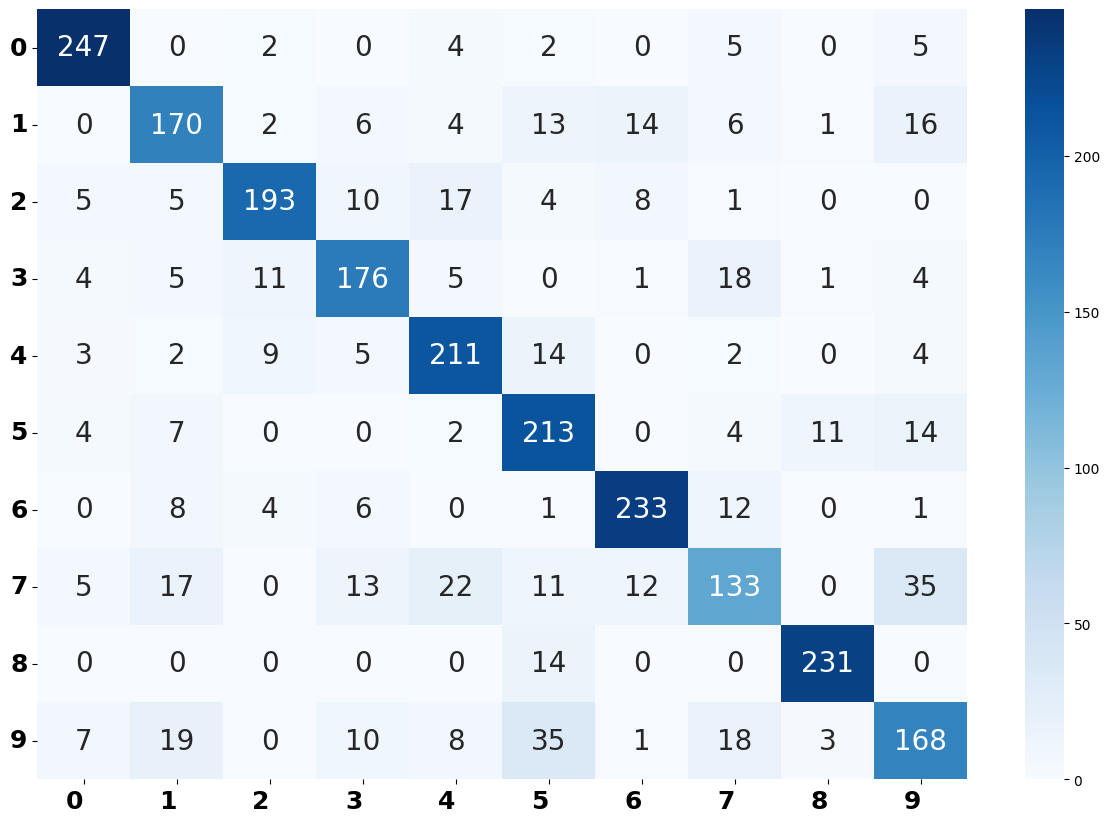

In [ ]:
## plotting confusion matrix

# Importing
from sklearn.metrics import confusion_matrix
import seaborn as sns

# maaking prediction
prediction = model.predict(X_test)
y_prediction = tf.argmax(prediction , axis = 1)

# plotting confusion matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test , y_prediction))

# Visualising confusion matrix
plt.figure(figsize = (15,10),facecolor='white')
heatmap = sns.heatmap(confusion_matrix, annot = True, annot_kws = {'size': 20}, fmt = 'd', cmap = 'Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0 , ha = 'right', fontsize = 18, weight='bold')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0 , ha = 'right', fontsize = 18, weight='bold')
plt.show()

In [ ]:
## Choosing Colormaps in Matplotlib
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [ ]:
# load model
model = tf.keras.models.load_model('/content/drive/My Drive/model_2.h5')

## 📚 Refrences

* [How to plot Confusion Matrix](https://stackoverflow.com/questions/71232646/how-to-plot-confusion-matrix)

* [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

* [ Why set `return_sequences = true` and `stateful  = true` for tf.keras.layers.lstm](https://stackoverflow.com/questions/55296013/why-set-return-sequences-true-and-stateful-true-for-tf-keras-layers-lstm)